# Первый computational notebook

## Упражнение: Вычисление числа pi с помощью метода Монте-Карло

1. Создайте новый блокнот , назовите его и добавьте заголовок (ячейку в формате
markdown ниже).

## Подсчёт PI с помощью метода Монте-Карло

2. Зафиксируйте соответствующие формулы в новой ячейке (ячейке с Markdown):

## Формулы: 

- Площадь квадрата: $s = (2 r)^2$
- Площадь круга: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

3. Добавьте изображение для пояснения концепции (ячейка markdown):

![Дротики](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

4. Импортируйте два модуля, которые нам понадобятся (ячейка с кодом):

In [2]:
import random
import matplotlib.pyplot as plt

5. Инициализируйте количество точек (ячейка с кодом):

In [3]:
num_points = 1000

6. Броски дротиков (ячейка с кодом):

In [4]:
points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x +y*y < 1.0:
        hits += 1
        points.append((x, y, "red"))
    else:
        points.append((x, y, "blue"))


7. Построение графика результатов (ячейка с кодом):

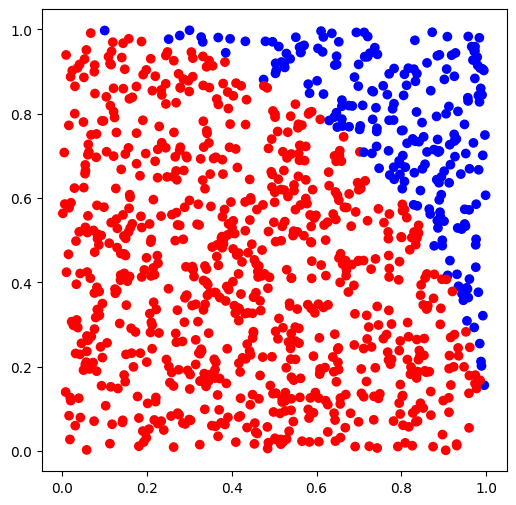

In [5]:
x, y, colors = zip(*points)

fig, ax = plt.subplots() 
fig.set_size_inches(6.0, 6.0)

ax.scatter(x, y, c=colors)

8. Вычислите оценку для pi (ячейка с кодом):

In [6]:
fraction = hits / num_points
print("PI = ", 4 * fraction)

PI =  3.124


## Зависимости

In [7]:
!python -m pip install pandas matplotlib
!python -m pip install pandas matplotlib seaborn
!python -m pip install ipywidgets

In [8]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme(style="whitegrid")
from itertools import cycle

## Метод Монте-Карло через функции

In [9]:
from matplotlib import pyplot 
import random
from ipywidgets import interact, widgets 

In [10]:
%matplotlib inline

In [11]:
def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points

In [12]:
def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)

In [13]:
def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

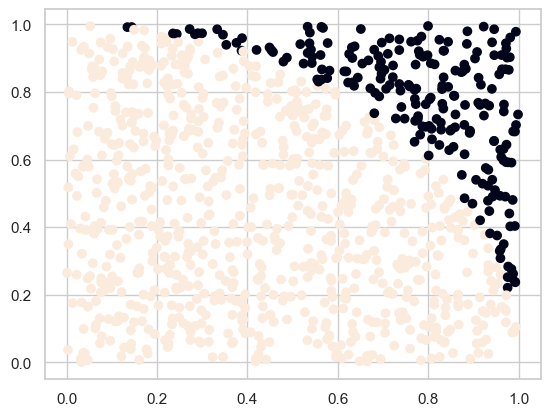

In [14]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100,value=1000))

## Виджеты для интерактивной подгонки данных (data fitting)

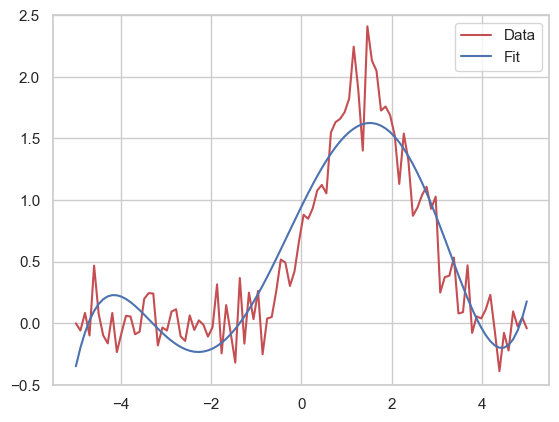

In [15]:
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline


def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)


def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y


def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit


def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()


x, y = noisy_gaussian()
yfit = fit(x, y, n=5)  # fit a 5th order polynomial to it
plot(x, y, yfit)